In [1]:
# Basic packages always been used
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data scaling
from sklearn.preprocessing import MinMaxScaler

# Function for spilting training & testing data set
from sklearn.model_selection import train_test_split

# Tensorflow sequential models
import tensorflow as tf
from tensorflow import keras
from keras import backend as clear
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras.optimizers import SGD
from keras.optimizers import Adam

# Functions for evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

In [2]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 18225488955554949698
 xla_global_id: -1,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 14328594432
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 9163189502051852985
 physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
 xla_global_id: 416903419]

In [3]:
# Symmetric Mean Absolute Percentage Error (SMAPE)
def SMAPE_calulate(y_true, y_pred):
    n = len(y_true)
    SMAPE=(100 / n) * np.sum(2 * np.abs(y_pred - y_true) / (np.abs(y_pred) + np.abs(y_true)))
    return SMAPE

# Relative Absolute Error (RAE)
def RAE_calculate(y_true, y_pred):
    abs_errors = np.abs(y_true - y_pred)
    denominator = np.sum(np.abs(y_true - np.mean(y_true)))
    RAE=np.sum(abs_errors/denominator)
    return RAE

# Mean Relative Absolute Error (MRAE)
def MRAE_calculate(y_true, y_pred):
    n=len(y_true)
    abs_errors = np.abs(y_true - y_pred)
    denominator = np.sum(np.abs(y_true - np.mean(y_true)))
    RAE=np.sum(abs_errors/denominator)
    MRAE=RAE/n
    return MRAE

# Median Relative Absolute Error (MdRAE) comparing with benchmark
# Note: By default, the bench value is the mean of actual value
def MdRAE_calculate(y_true, y_pred, bench=None):
    if bench==None:
        bench=np.mean(y_true)
        MdRAE=np.median(np.abs(y_true - y_pred)/np.abs(y_true - bench))
        return MdRAE,bench
    else:
        MdRAE=np.median(np.abs(y_true - y_pred)/np.abs(y_true - bench))
        return MdRAE

# Relative Squared Error (RSE) & Root Relative Squared Error (RRSE)
def RSE_calculate(y_true, y_pred, Root=False):
    mse = np.mean((y_true - y_pred)**2)
    denominator = np.var(y_true)
    RSE=mse/denominator

    if Root==True:
        return np.sqrt(RSE)
    else:
        return RSE

In [17]:
# Functions for evaluation
from sklearn.metrics import mean_absolute_error #MAE
from sklearn.metrics import mean_squared_error #MSE,RMSE
from sklearn.metrics import mean_absolute_percentage_error #MAPE

In [5]:
from keras.losses import mse
from keras.backend import sqrt

def my_RMSE(y_true, y_pred):
    return sqrt(mse(y_true, y_pred))

# Register custom object
#from keras.utils.generic_utils import get_custom_objects for pc
from tensorflow.keras.saving import get_custom_objects
get_custom_objects().update({'my_RMSE': my_RMSE})

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# ***Final Models 解果***

In [6]:
DNN_model1=keras.models.load_model('/content/drive/MyDrive/1112DL作業/Final models/DNN_trained0613_model1.h5')
print('Model successfully loaded...')

Model successfully loaded...


In [7]:
DNN_model2=keras.models.load_model('/content/drive/MyDrive/1112DL作業/Final models/DNN_trained0613_model2.h5')
print('Model successfully loaded...')

Model successfully loaded...


In [8]:
DNN_model3=keras.models.load_model('/content/drive/MyDrive/1112DL作業/Final models/DNN_trained0613_model3.h5')
print('Model successfully loaded...')

Model successfully loaded...


# ***Testing***

In [77]:
df=pd.read_csv('/content/drive/MyDrive/1112DL作業/Netflix_Lags3_0612.csv')

In [78]:
split =int(0.8*df.shape[0])
print('Training data:', split)
#Train,Test  = data[0:split] , data[split:]

Training data: 1004


In [79]:
Forecast_train_data, Forecast_test_data = df[0:split], df[split:]

In [80]:
# X test
x_forecast_test=Forecast_test_data.drop(['Date','Close'],axis=1).copy()
# Y test
y_forecast_test=Forecast_test_data['Close'].copy()

In [81]:
# 8.1 Make prediction - Model1,2,3
prediction=np.round((DNN_model1.predict_on_batch(x_forecast_test)),2)
#prediction=np.round((DNN_model2.predict_on_batch(x_forecast_test)),2)
#prediction=np.round((DNN_model3.predict_on_batch(x_forecast_test)),2)

pred_values=[]
for i in range(0,len(prediction)):
    value=prediction[i][0]
    pred_values.append(value)

In [82]:
Results=pd.DataFrame({'Date':Forecast_test_data['Date'],'Y_true':Forecast_test_data['Close'],'Predict':pred_values})
Results['abs Error']=np.abs(Results['Y_true']-Results['Predict'])
Results

,Date,Y_true,Predict,abs Error
1004,2022-06-08,202.830002,221.320007,18.490005
1005,2022-06-09,192.770004,226.250000,33.479996
1006,2022-06-10,182.940002,214.250000,31.309998
1007,2022-06-13,169.690002,206.119995,36.429993
1008,2022-06-14,167.539993,202.259995,34.720002
...,...,...,...,...
1250,2023-06-01,403.130005,410.839996,7.709991
1251,2023-06-02,400.470001,418.739990,18.269989
1252,2023-06-05,403.540009,416.190002,12.649993
1253,2023-06-06,399.290009,419.160004,19.869995


In [83]:
# 8.2 Calculating the mertics
MAE=mean_absolute_error(y_forecast_test,pred_values)
MSE=mean_squared_error(y_forecast_test,pred_values,squared=True)
RMSE=mean_squared_error(y_forecast_test,pred_values,squared=False)
MAPE=mean_absolute_percentage_error(y_forecast_test,pred_values)
SMAPE=SMAPE_calulate(y_forecast_test,pred_values)
RAE=RAE_calculate(y_forecast_test,pred_values)
MRAE=MRAE_calculate(y_forecast_test,pred_values)
MdRAE=MdRAE_calculate(y_forecast_test,pred_values)
RSE=RSE_calculate(y_forecast_test,pred_values,Root=False)
RRSE=RSE_calculate(y_forecast_test,pred_values,Root=True)

print('MAE:',round(MAE,3))
print('MSE:',round(MSE,3))
print('RMSE:',round(RMSE,3))
print('MAPE:',round(MAPE*100,3),'%')
print('SMAPE:',round(SMAPE,3),'%')
print('RAE:',round(RAE,3))
print('MRAE:',MRAE)
print('MdRAE:',round(MdRAE[0],3),'bench:',round(MdRAE[1],3))
print('RSE:',round(RSE,3))
print('RRSE:',round(RRSE,3))

MAE: 16.423
MSE: 336.913
RMSE: 18.355
MAPE: 6.427 %
SMAPE: 6.143 %
RAE: 0.322
MRAE: 0.0012822265253135553
MdRAE: 0.322 bench: 284.005
RSE: 0.096
RRSE: 0.31


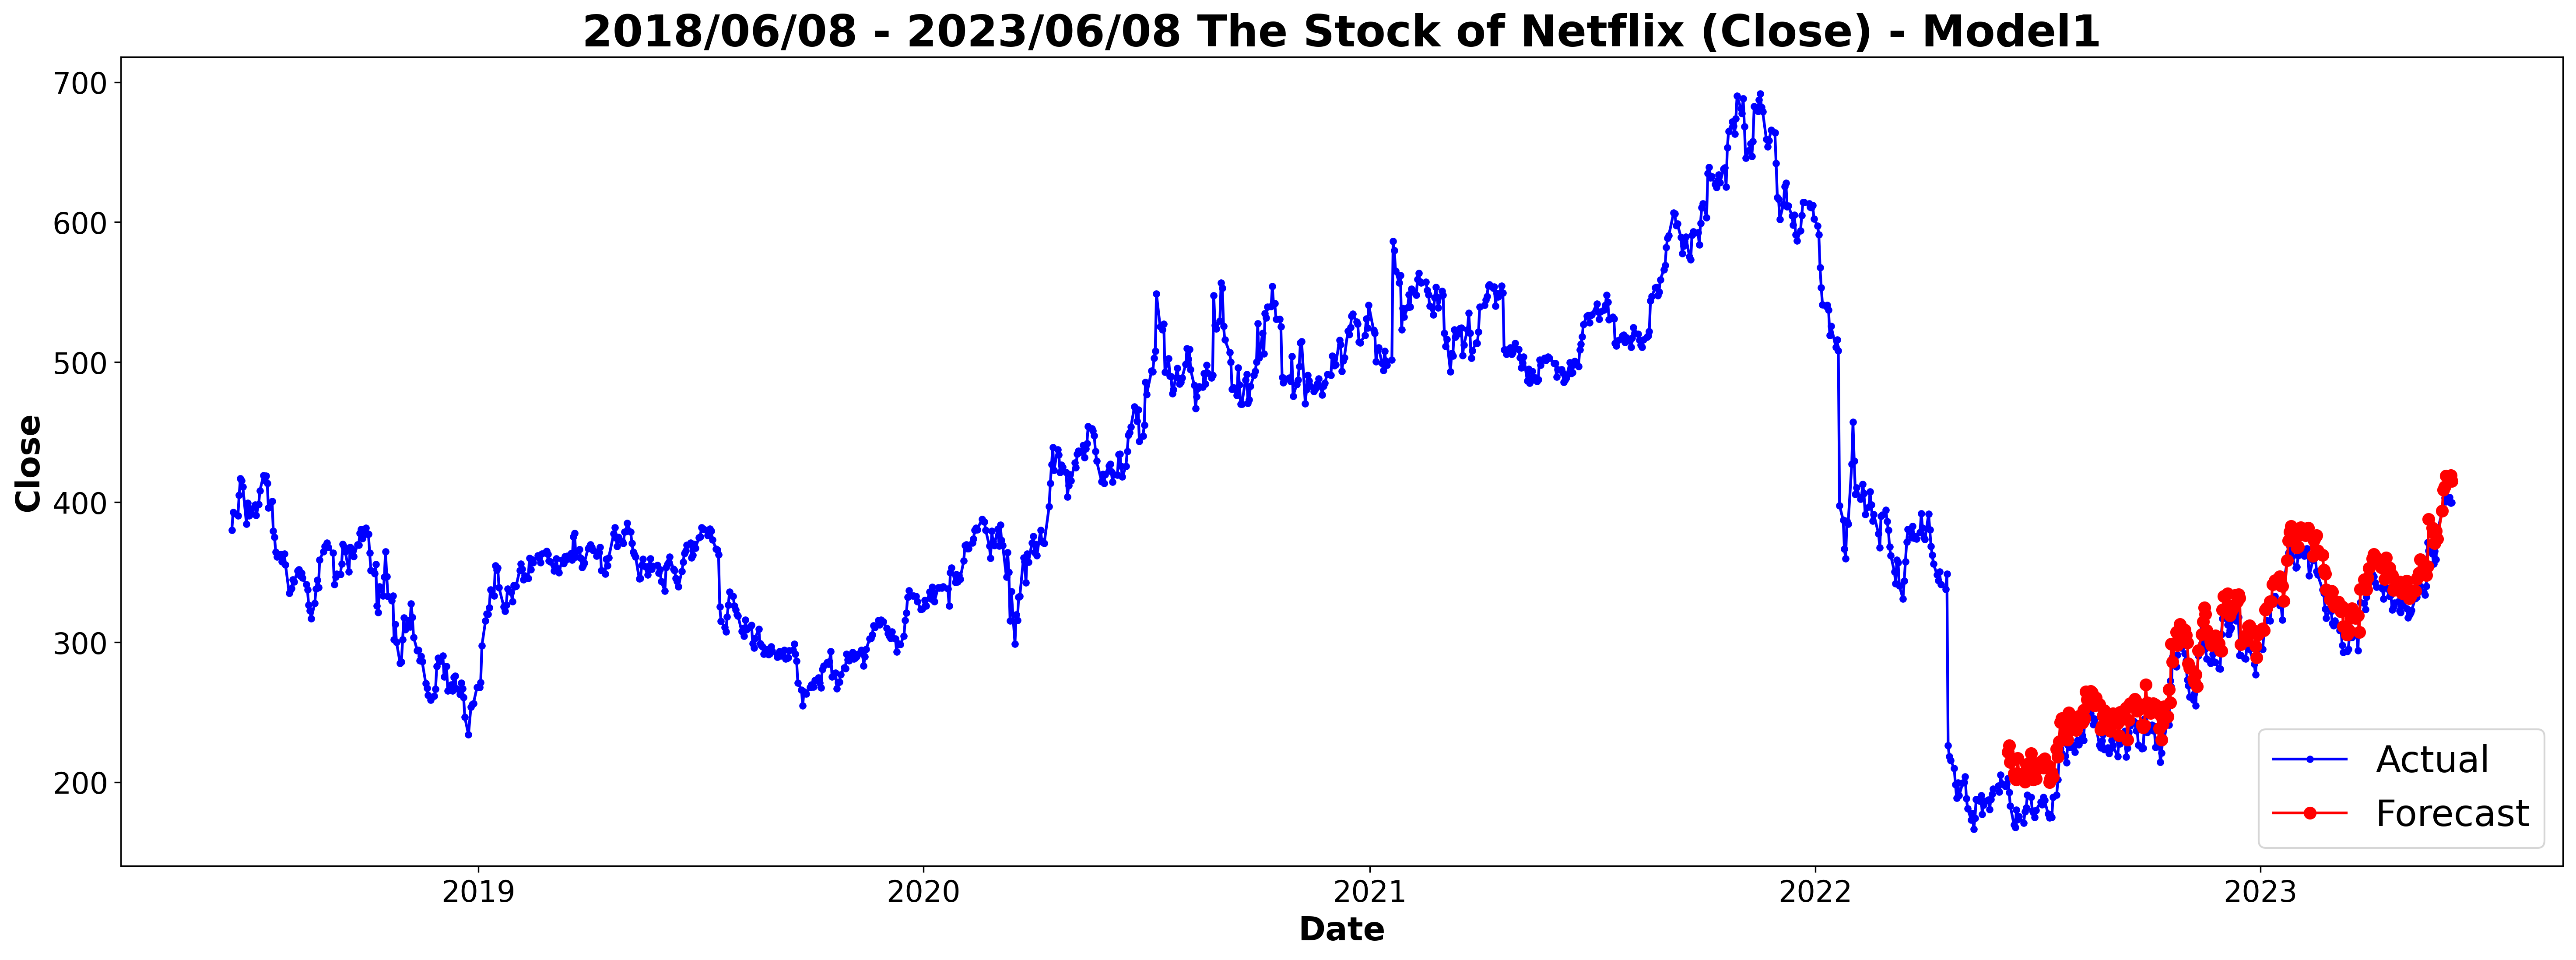

In [84]:
# Plot Y and its corresponding date
# Figure setting
plt.figure(figsize=(24,8),dpi=300)
plt.title('2018/06/08 - 2023/06/08 The Stock of Netflix (Close) - Model1',weight='bold',fontsize=24)
plt.xlabel('Date',fontsize=18,weight='bold')
plt.ylabel('Close',fontsize=18,weight='bold')

# Comparison of actual value and predicted value according to Date
#plt.plot(df.iloc[900:,0],df.iloc[900:,1],marker='o',color='blue',label='Actual')
#plt.plot(Results['Date'],Results['Predict'],marker='o',color='red',label='Forecast')
plt.plot(pd.to_datetime(df['Date']),df['Close'],marker='.',color='blue',label='Actual')
plt.plot(pd.to_datetime(Results['Date']),Results['Predict'],marker='o',color='red',label='Forecast')

# Set the axis
plt.xticks(fontsize=16)
#plt.xlim([datetime.date(2018, 5, 1), datetime.date(2023, 6, 30)]) #針對x軸內容調整 （需要 import datetime）
plt.yticks(fontsize=16)

# Set legends
plt.legend(loc=4,fontsize=20)

plt.show()

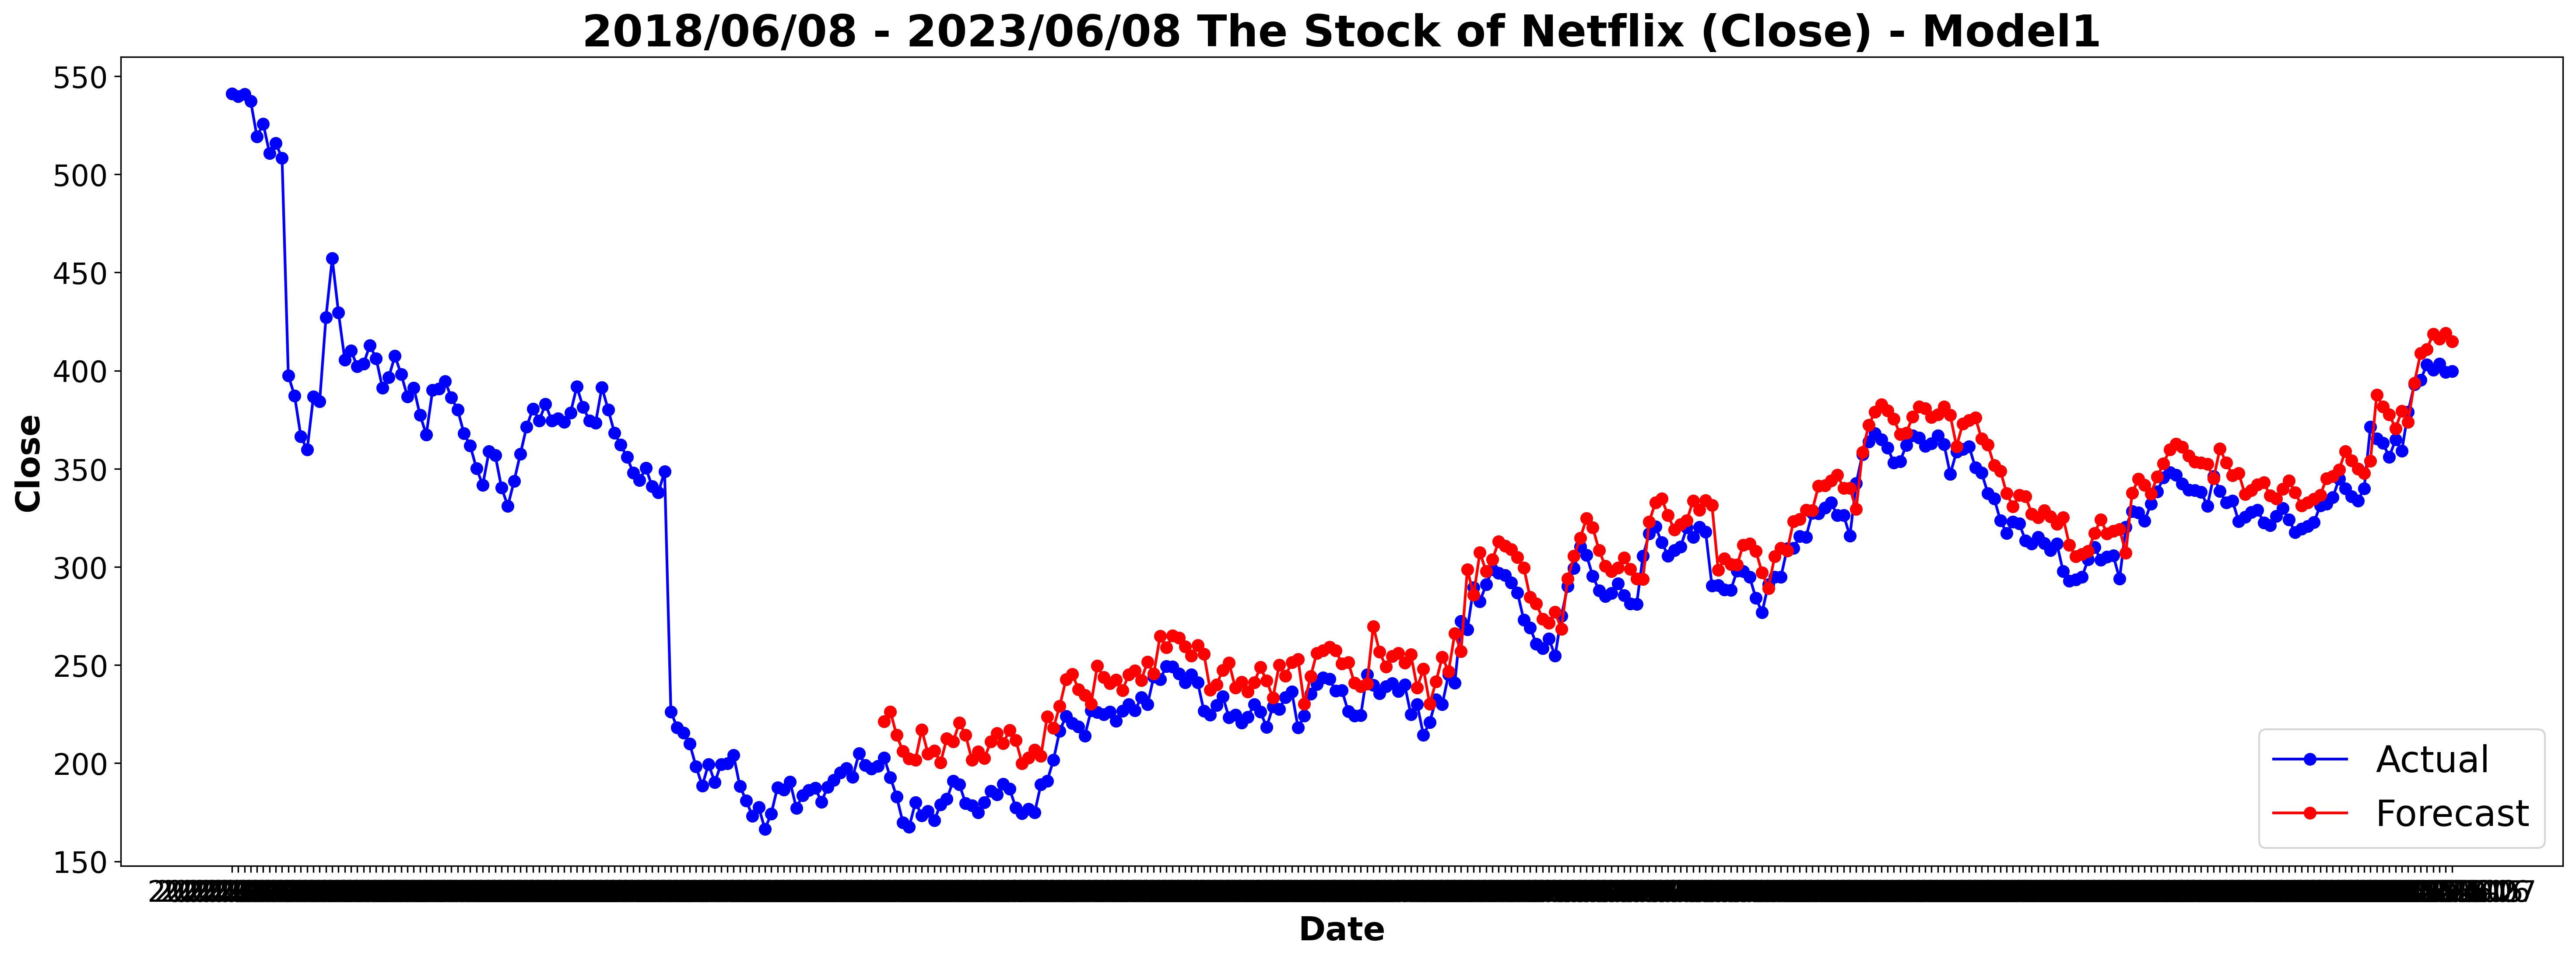

In [85]:
# Plot Y and its corresponding date
# Figure setting
plt.figure(figsize=(24,8),dpi=300)
plt.title('2018/06/08 - 2023/06/08 The Stock of Netflix (Close) - Model1',weight='bold',fontsize=24)
plt.xlabel('Date',fontsize=18,weight='bold')
plt.ylabel('Close',fontsize=18,weight='bold')

# Comparison of actual value and predicted value according to Date
plt.plot(df.iloc[900:,0],df.iloc[900:,1],marker='o',color='blue',label='Actual')
plt.plot(Results['Date'],Results['Predict'],marker='o',color='red',label='Forecast')
#plt.plot(pd.to_datetime(df['Date']),df['Close'],marker='.',color='blue',label='Actual')
#plt.plot(pd.to_datetime(Results['Date']),Results['Predict'],marker='o',color='red',label='Forecast')

# Set the axis
plt.xticks(fontsize=16)
#plt.xlim([datetime.date(2018, 5, 1), datetime.date(2023, 6, 30)]) #針對x軸內容調整 （需要 import datetime）
plt.yticks(fontsize=16)

# Set legends
plt.legend(loc=4,fontsize=20)

plt.show()

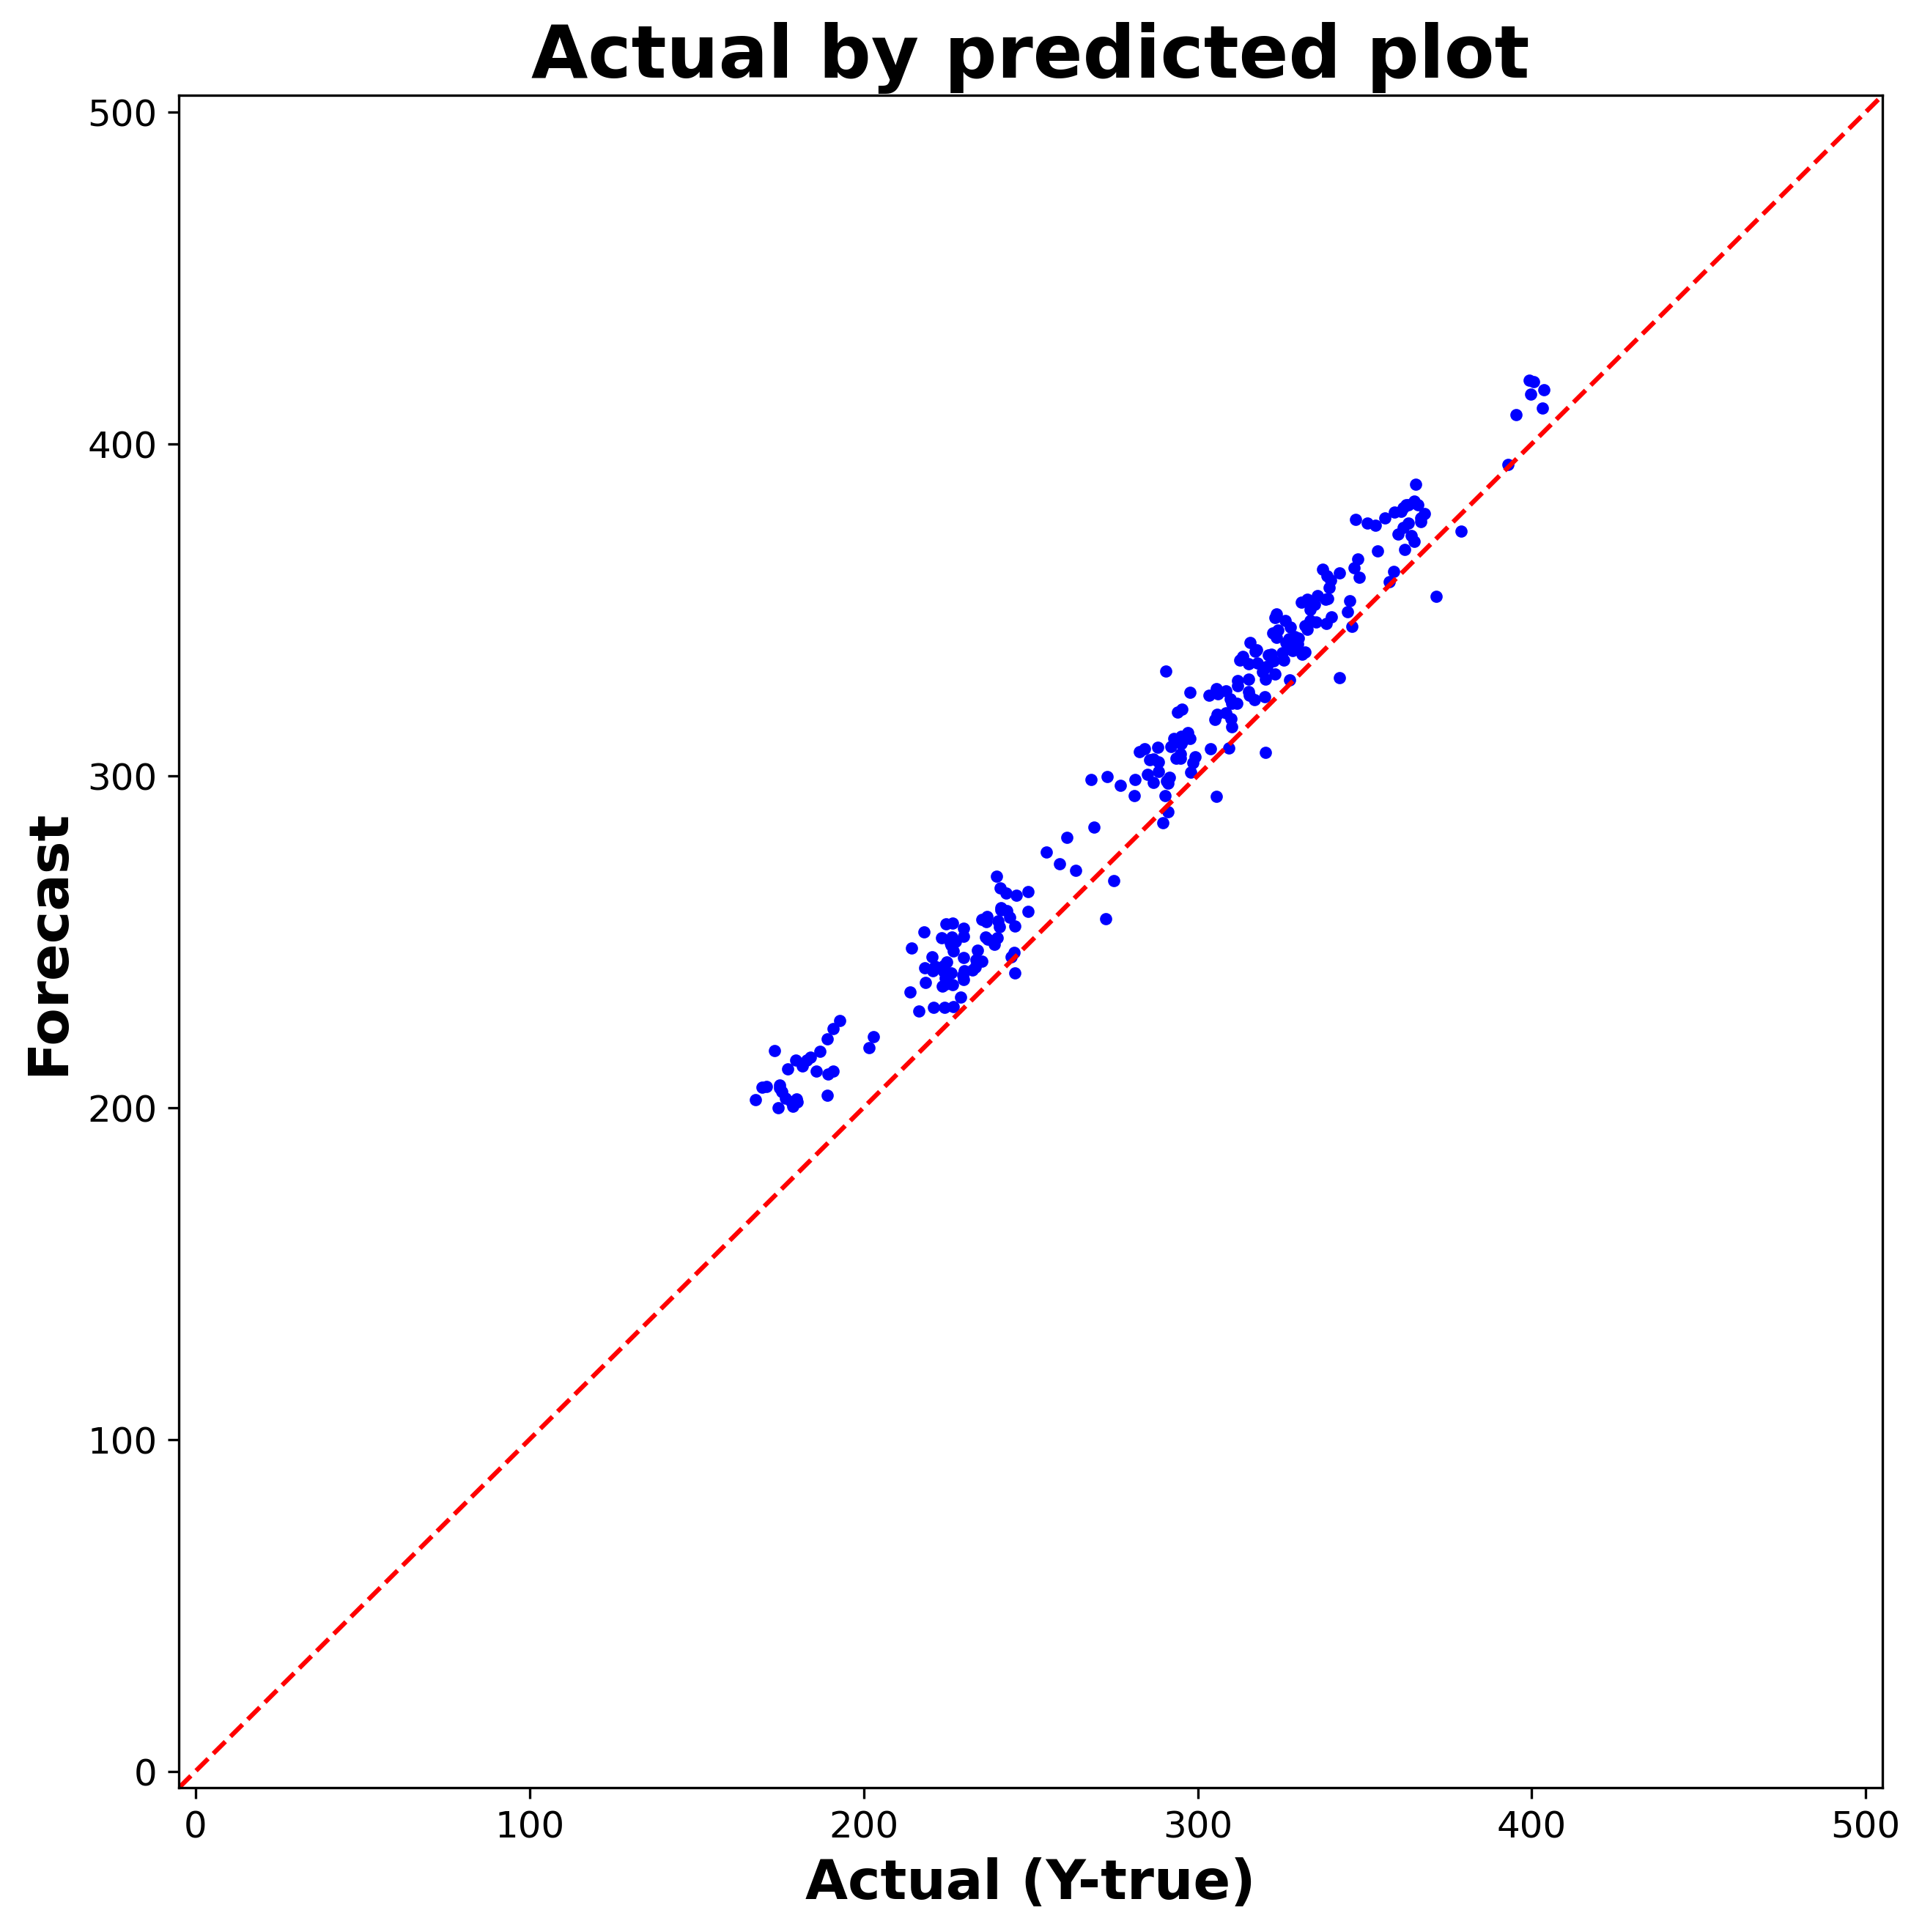

In [86]:
# Lock the scale of axis by Y_true
max_value=500+5
min_value=0-5

# Figure setting
plt.figure(figsize=(10,10),dpi=300)
plt.title('Actual by predicted plot',weight='bold',fontsize=24)
plt.xlabel('Actual (Y-true)',fontsize=18,weight='bold')
plt.ylabel('Forecast',fontsize=18,weight='bold')

# Perfect model reference line
plt.plot([min_value,max_value], [min_value,max_value], linestyle='--',color='red')

# Actual by predicted plot
plt.scatter(Results.iloc[:,1],Results.iloc[:,2],marker='.',color='blue')

# Set the axis
plt.ylim(0-5,max_value)
plt.xlim(0-5,max_value)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()